In [7]:
!pip install pymc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


In [4]:
!pip install --upgrade pymc3

  Using cached pymc3-3.11.6-py3-none-any.whl.metadata (15 kB)
  Using cached deprecat-2.1.3-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.1.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
  Using cached pymc3-3.11.5-py3-none-any.whl.metadata (14 kB)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

In [13]:
# Set random seed for reproducibility
np.random.seed(42)
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [15]:
print("Dataset shape:", train.shape)
print("\nFirst few rows:")
train.head()

Dataset shape: (161620, 20)

First few rows:


,Interest_Rate,Loan_Amount_Requested,Number_of_Payments,Years_Employed,Annual_Income,Income_Verified,Loan_Category,State,Debt_to_Income_Ratio,Delinquencies_2Y,Credit_Inquiries_6M,Derogatory_Public_Records,Total_Credit_Revolving_Balance,Revolving_Utilization_Rate,Total_Credit_Lines,Initial_Listing_Status,Days_Between_X15_X23,Funded_to_Requested_Ratio,Loan_to_Income_Ratio,Active_Credit_Line_Ratio
0,12.12,0.653888,1,1,0.754974,0,4,42,-0.530104,-0.333534,-0.783783,-0.250851,0.767728,0.220724,-0.377620,0,1.183949,0.084002,-0.336270,-0.543773
1,11.14,0.752423,0,0,-0.000577,2,2,4,-0.664851,-0.333534,-0.783783,-0.250851,0.271488,1.030576,-1.002825,0,-0.283561,0.084002,0.583870,-0.505864
2,17.27,-0.725600,0,9,-0.306881,1,2,33,-0.914530,-0.333534,-0.783783,-0.250851,0.052635,0.852904,-0.466935,0,-1.269577,0.084002,-0.630514,-0.772283
3,7.62,-0.627065,0,5,-0.286461,1,11,39,-1.386145,-0.333534,0.178156,-0.250851,-0.832042,-2.345186,-0.734880,0,-0.666812,0.084002,-0.529315,-0.088861
4,14.65,2.599952,1,1,-0.204780,0,6,39,-1.121935,-0.333534,0.178156,-0.250851,-0.034853,-0.175939,-0.198990,0,0.570387,0.084002,3.160687,0.745145


In [16]:
print("Dataset shape:", test.shape)
print("\nFirst few rows:")
test.head()

Dataset shape: (40405, 20)

First few rows:


,Interest_Rate,Loan_Amount_Requested,Number_of_Payments,Years_Employed,Annual_Income,Income_Verified,Loan_Category,State,Debt_to_Income_Ratio,Delinquencies_2Y,Credit_Inquiries_6M,Derogatory_Public_Records,Total_Credit_Revolving_Balance,Revolving_Utilization_Rate,Total_Credit_Lines,Initial_Listing_Status,Days_Between_X15_X23,Funded_to_Requested_Ratio,Loan_to_Income_Ratio,Active_Credit_Line_Ratio
0,11.14,-0.479263,0,6,-0.449824,2,1,27,-0.789030,1.139301,-0.783783,-0.250851,0.046667,-0.977527,-0.377620,0,0.844241,0.084002,-0.086103,-0.366863
1,11.14,-0.725600,0,7,-0.756128,2,2,34,0.348395,-0.333534,-0.783783,-0.250851,0.125778,0.047184,-0.198990,0,-0.272405,0.084002,0.209060,-0.783866
2,13.11,-1.064314,0,1,-0.459932,0,1,27,1.377494,-0.333534,-0.783783,-0.250851,0.360024,0.980993,-0.377620,0,0.187856,0.084002,-0.933027,-0.150639
3,7.62,-1.095106,0,8,-1.042625,2,2,4,0.693189,-0.333534,-0.783783,-0.250851,-0.617326,-1.791512,0.515531,0,-0.338979,0.084002,0.392177,0.340779
4,13.53,-0.048173,0,4,-0.408983,2,2,5,0.217611,-0.333534,0.178156,2.196541,-0.077263,0.489297,-1.270770,0,2.246616,0.084002,0.447814,-0.922867


In [50]:
train.describe()

,Interest_Rate,Loan_Amount_Requested,Number_of_Payments,Years_Employed,Annual_Income,Income_Verified,Loan_Category,State,Debt_to_Income_Ratio,Delinquencies_2Y,Credit_Inquiries_6M,Derogatory_Public_Records,Total_Credit_Revolving_Balance,Revolving_Utilization_Rate,Total_Credit_Lines,Initial_Listing_Status,Days_Between_X15_X23,Funded_to_Requested_Ratio,Loan_to_Income_Ratio,Active_Credit_Line_Ratio
count,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000,161620.000000
mean,13.897676,-0.000630,0.243602,3.643101,0.001008,0.889933,2.820660,22.317888,0.000254,0.000137,0.000939,0.000915,-0.000577,-0.000122,0.000860,0.181822,0.000284,0.000223,-0.001825,0.000818
std,4.405739,0.999161,0.429257,3.125450,1.008691,0.869138,2.628607,14.855012,1.000076,1.002648,1.002299,0.998943,0.998032,1.000171,0.999676,0.385699,1.002202,0.997797,0.998124,0.997463
min,5.420000,-1.649364,0.000000,0.000000,-1.346683,0.000000,0.000000,0.000000,-2.173491,-0.333534,-0.783783,-0.250851,-0.832042,-2.345186,-1.985291,0.000000,-9.867715,-29.736000,-1.871902,-2.312878
25%,10.740000,-0.744075,0.000000,1.000000,-0.449824,0.000000,2.000000,7.000000,-0.749398,-0.333534,-0.783783,-0.250851,-0.488004,-0.696558,-0.734880,0.000000,-0.600597,0.084002,-0.776689,-0.666250
50%,13.670000,-0.232926,0.000000,2.000000,-0.204780,1.000000,2.000000,22.000000,-0.033389,-0.333534,-0.783783,-0.250851,-0.207710,0.092635,-0.109675,0.000000,-0.152212,0.084002,-0.158253,-0.204695
75%,16.780000,0.678522,0.000000,6.000000,0.203626,2.000000,2.000000,34.000000,0.715647,-0.333534,0.178156,-0.250851,0.228032,0.795058,0.604846,0.000000,0.482941,0.084002,0.678208,0.411543
max,26.060000,2.599952,1.000000,10.000000,144.407263,2.000000,13.000000,49.000000,2.872923,42.378677,6.911728,131.908295,133.673044,3.456001,7.214161,1.000000,3.933280,0.084002,5.296352,25.904333


In [17]:
y_train = train['Interest_Rate']
X_train = train.drop('Interest_Rate', axis=1)
y_test = test['Interest_Rate']
X_test = test.drop('Interest_Rate', axis=1)

In [20]:
print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (161620, 19), Test set: (40405, 19)


In [33]:
# 3. Linear Regression Model
""" Linear regression focuses solely on minimizing the sum of squared errors,
and the optimization process will find the correct coefficients regardless of feature scaling.
The coefficients will automatically adjust to account for the different scales of the features."""

def train_linear_regression(X_train, y_train, X_test, y_test):
    # Initialize and train the model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_test = np.sqrt(mean_squared_error(y_train, y_pred_train))

    print("\n=== Linear Regression Results ===")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Training RMSE: {rmse_train:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")

    # Get feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lr_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print("\nTop 10 most important features:")
    print(feature_importance.head(10))

    # Cross-validation
    cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"\nCross-validation MSE: {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    return lr_model, y_pred_test


In [34]:
# 4. Bayesian Linear Regression Model
def train_bayesian_regression(X_train, y_train, X_test, y_test):
    # For simplicity, we'll use fewer samples in the actual implementation
    n_samples = 1000

    # We'll select a subset of features to make the model more tractable
    # Let's select the top 5 most important features from the linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lr_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    top_features = feature_importance.head(5)['Feature'].tolist()
    X_train_sub = X_train[top_features]
    X_test_sub = X_test[top_features]

    # Standardize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train_sub)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    X_test_scaled = scaler_X.transform(X_test_sub)

    print("\n=== Bayesian Linear Regression ===")
    print(f"Using top {len(top_features)} features: {', '.join(top_features)}")

    # Define and train the Bayesian model
    with pm.Model() as bayesian_model:
        # Define priors for unknown model parameters
        alpha = pm.Normal('alpha', mu=0, sigma=10)
        betas = pm.Normal('betas', mu=0, sigma=10, shape=len(top_features))
        sigma = pm.HalfNormal('sigma', sigma=1)

        # Expected value of outcome
        mu = alpha + pm.math.dot(X_train_scaled, betas)

        # Likelihood (sampling distribution) of observations
        likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y_train_scaled)

        # Draw posterior samples
        trace = pm.sample(n_samples, tune=1000, cores=1, return_inferencedata=True)

    # Get the posterior mean values
    alpha_mean = float(trace.posterior.alpha.mean())
    betas_mean = trace.posterior.betas.mean(axis=(0, 1)).values

    # Make predictions (using posterior means)
    y_pred_train_scaled = alpha_mean + np.dot(X_train_scaled, betas_mean)
    y_pred_test_scaled = alpha_mean + np.dot(X_test_scaled, betas_mean)

    # Rescale predictions back to original scale
    y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
    y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_test = np.sqrt(mean_squared_error(y_train, y_pred_train))

    print("\nBayesian Linear Regression Results:")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Training RMSE: {rmse_train:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")

    # Feature importance from Bayesian model
    bayesian_importance = pd.DataFrame({
        'Feature': top_features,
        'Coefficient': betas_mean
    }).sort_values('Coefficient', key=abs, ascending=False)

    print("\nBayesian feature importance:")
    print(bayesian_importance)

    # Credible intervals for coefficients
    #print("\nCredible intervals for coefficients:")
    #for i, feature in enumerate(top_features):
    #    hdi = az.hdi(trace.posterior.betas[:, :, i])
    #    print(f"{feature}: {betas_mean[i]:.4f} [{hdi[0]:.4f}, {hdi[1]:.4f}]")

    return trace, betas_mean, y_pred_test


In [35]:
# 5. Compare Models
def compare_models(y_test, lr_pred, bay_pred):
    lr_mse = mean_squared_error(y_test, lr_pred)
    bay_mse = mean_squared_error(y_test, bay_pred)

    lr_r2 = r2_score(y_test, lr_pred)
    bay_r2 = r2_score(y_test, bay_pred)

    lr_mae = mean_absolute_error(y_test, lr_pred)
    bay_mae = mean_absolute_error(y_test, bay_pred)

    print("\n=== Model Comparison ===")
    print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}, MAE: {lr_mae:.4f}")
    print(f"Bayesian Regression - MSE: {bay_mse:.4f}, R²: {bay_r2:.4f}, MAE: {bay_mae:.4f}")

    # Visualization
    plt.figure(figsize=(12, 8))

    # Scatter plot for predictions
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_pred, alpha=0.5, label='Linear Regression')
    plt.scatter(y_test, bay_pred, alpha=0.5, label='Bayesian Regression')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Interest Rate')
    plt.ylabel('Predicted Interest Rate')
    plt.title('Predictions Comparison')
    plt.legend()

    # Residuals plot
    plt.subplot(2, 2, 2)
    plt.hist(y_test - lr_pred, bins=50, alpha=0.5, label='Linear Regression')
    plt.hist(y_test - bay_pred, bins=50, alpha=0.5, label='Bayesian Regression')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Distribution')
    plt.legend()

    # Error distribution
    plt.subplot(2, 2, 3)
    sns.kdeplot(y_test - lr_pred, label='Linear Regression')
    sns.kdeplot(y_test - bay_pred, label='Bayesian Regression')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.title('Error Distribution')
    plt.legend()

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

Starting regression analysis...

=== Linear Regression Results ===
Training MSE: 10.4404
Test MSE: 10.4491
Training R²: 0.4621
Test R²: 0.4609
Training MAE: 2.5842
Test MAE: 2.5867
Training RMSE: 3.2325
Test RMSE: 3.2312

Top 10 most important features:
                           Feature  Coefficient
1               Number_of_Payments     3.930126
12      Revolving_Utilization_Rate     1.810011
9              Credit_Inquiries_6M     1.004599
8                 Delinquencies_2Y     0.528610
11  Total_Credit_Revolving_Balance    -0.413002
10       Derogatory_Public_Records     0.375960
18        Active_Credit_Line_Ratio    -0.345124
15            Days_Between_X15_X23    -0.333666
5                    Loan_Category     0.259455
7             Debt_to_Income_Ratio     0.247865

Cross-validation MSE: 10.4545 ± 0.1183

=== Bayesian Linear Regression ===
Using top 5 features: Number_of_Payments, Revolving_Utilization_Rate, Credit_Inquiries_6M, Delinquencies_2Y, Total_Credit_Revolving_Balance


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ce35efd5a80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

Output()


Bayesian Linear Regression Results:
Training MSE: 11.4490
Test MSE: 11.4481
Training R²: 0.4102
Test R²: 0.4093
Training MAE: 2.7114
Test MAE: 2.7086
Training RMSE: 3.3835
Test RMSE: 3.3836

Bayesian feature importance:
                          Feature  Coefficient
0              Number_of_Payments     0.418917
1      Revolving_Utilization_Rate     0.411374
2             Credit_Inquiries_6M     0.231691
3                Delinquencies_2Y     0.105210
4  Total_Credit_Revolving_Balance    -0.103415

=== Model Comparison ===
Linear Regression - MSE: 10.4491, R²: 0.4609, MAE: 2.5867
Bayesian Regression - MSE: 11.4481, R²: 0.4093, MAE: 2.7086


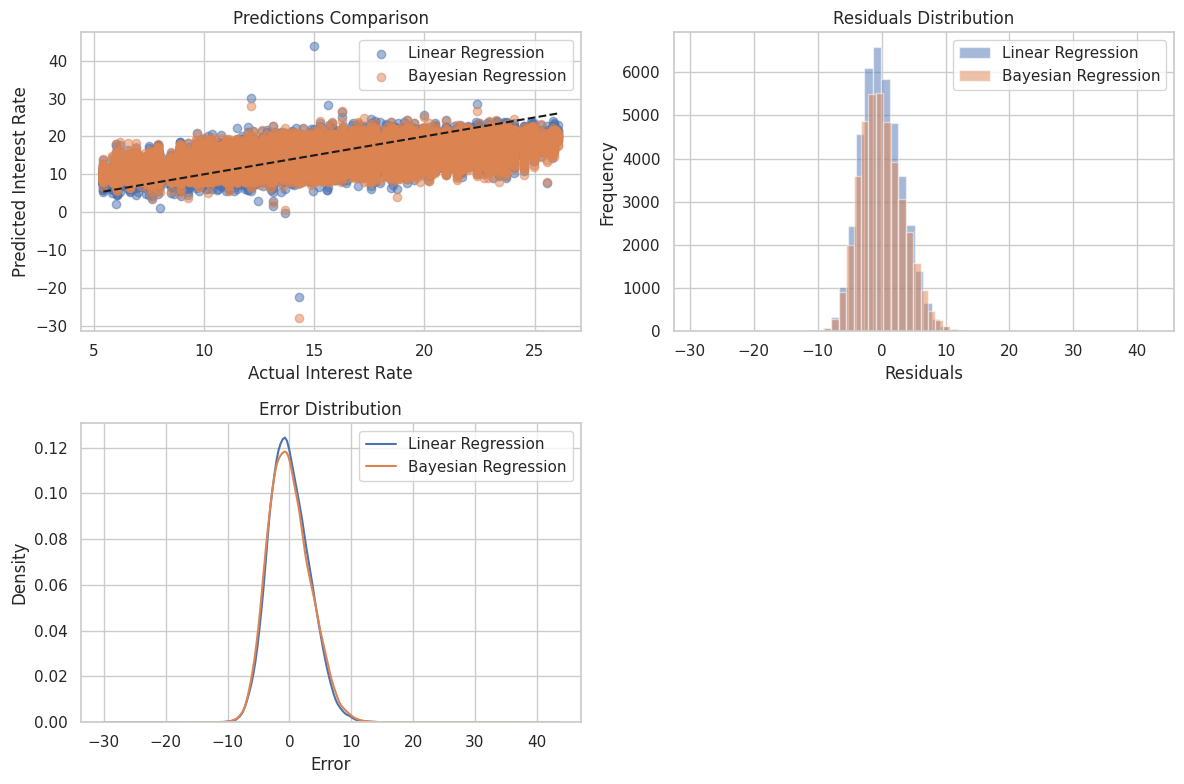


Analysis completed!


In [36]:
# 6. Main function to run the entire analysis
def main():
    print("Starting regression analysis...")

    # Train Linear Regression
    lr_model, lr_predictions = train_linear_regression(X_train, y_train, X_test, y_test)

    # Train Bayesian Linear Regression
    trace, bayesian_coefs, bay_predictions = train_bayesian_regression(X_train, y_train, X_test, y_test)

    # Compare the models
    compare_models(y_test, lr_predictions, bay_predictions)

    print("\nAnalysis completed!")

if __name__ == "__main__":
    main()

** Model Comparision**

Linear Regression outperforms Bayesian Regression across all metrics in this case.

* MSE (lower is better): Linear Regression has about 9% lower error variance than Bayesian Regression (10.45 vs 11.45).

* R² (higher is better): Linear Regression explains about 46% of the variance in interest rates, while Bayesian Regression explains about 41%. This means Linear Regression captures more of the
relationship between your features and target.

* MAE (lower is better): Linear Regression's predictions are on average about 2.59 percentage points away from the actual interest rates, while Bayesian Regression's are about 2.71 points away.





In [37]:
def dirichlet_regularized_least_squares(X_train, y_train, X_test, y_test, alpha=1.0):
    """
    Implement a Dirichlet-regularized least squares regression.

    This is a Bayesian-inspired approach where we use a Dirichlet prior to encourage
    sparsity and sum-to-one constraints on the coefficients, combined with least squares.

    Parameters:
    -----------
    X_train, y_train: Training data
    X_test, y_test: Test data
    alpha: Concentration parameter for the Dirichlet prior

    Returns:
    --------
    Dictionary with model results
    """
    n_features = X_train.shape[1]

    # Define the objective function to minimize (negative log posterior)
    def neg_log_posterior(beta):
        # Split coefficients into weights and intercept
        weights = beta[:-1]
        intercept = beta[-1]

        # Compute predictions
        y_pred = X_train.dot(weights) + intercept

        # Compute residual sum of squares (negative log likelihood assuming Gaussian noise)
        rss = np.sum((y_train - y_pred) ** 2)

        # Add regularization term (negative log of Dirichlet prior)
        # We transform weights to be positive and sum to 1 for the Dirichlet prior
        weights_abs = np.abs(weights)
        weights_normalized = weights_abs / (np.sum(weights_abs) + 1e-10)

        # Log of Dirichlet prior (we use alpha as concentration parameter)
        log_prior = (alpha - 1) * np.sum(np.log(weights_normalized + 1e-10))

        # Return negative log posterior
        return rss - log_prior

    # Initial guess for coefficients
    beta0 = np.zeros(n_features + 1)

    # Minimize the negative log posterior
    result = minimize(neg_log_posterior, beta0, method='BFGS')

    # Extract optimized coefficients
    weights = result.x[:-1]
    intercept = result.x[-1]

    # Make predictions
    y_train_pred = X_train.dot(weights) + intercept
    y_test_pred = X_test.dot(weights) + intercept

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Compute feature importance
    # Get absolute weights and normalize them to sum to 1
    weights_abs = np.abs(weights)
    importance = weights_abs / np.sum(weights_abs)

    # Create feature importance dataframe
    if hasattr(X_train, 'columns'):
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': weights,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
    else:
        feature_importance = pd.DataFrame({
            'Feature': [f'Feature_{i}' for i in range(n_features)],
            'Coefficient': weights,
            'Importance': importance
        }).sort_values('Importance', ascending=False)

    return {
        'weights': weights,
        'intercept': intercept,
        'train_metrics': {
            'mse': train_mse,
            'rmse': train_rmse,
            'r2': train_r2,
            'mae': train_mae
        },
        'test_metrics': {
            'mse': test_mse,
            'rmse': test_rmse,
            'r2': test_r2,
            'mae': test_mae
        },
        'feature_importance': feature_importance,
        'predictions': {
            'train': y_train_pred,
            'test': y_test_pred
        }
    }

In [44]:
def train_standard_models(X_train, y_train, X_test, y_test):
    """Train standard Linear and Bayesian Ridge models for comparison"""
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_train_pred = lr.predict(X_train)
    lr_test_pred = lr.predict(X_test)

    lr_results = {
        'train_metrics': {
            'mse': mean_squared_error(y_train, lr_train_pred),
            'rmse': np.sqrt(mean_squared_error(y_train, lr_train_pred)),
            'r2': r2_score(y_train, lr_train_pred),
            'mae': mean_absolute_error(y_train, lr_train_pred)
        },
        'test_metrics': {
            'mse': mean_squared_error(y_test, lr_test_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, lr_test_pred)),
            'r2': r2_score(y_test, lr_test_pred),
            'mae': mean_absolute_error(y_test, lr_test_pred)
        },
        'predictions': {
            'train': lr_train_pred,
            'test': lr_test_pred
        }
    }

    # Bayesian Ridge
    br = BayesianRidge()
    br.fit(X_train, y_train)
    br_train_pred = br.predict(X_train)
    br_test_pred = br.predict(X_test)

    br_results = {
        'train_metrics': {
            'mse': mean_squared_error(y_train, br_train_pred),
            'rmse': np.sqrt(mean_squared_error(y_train, br_train_pred)),
            'r2': r2_score(y_train, br_train_pred),
            'mae': mean_absolute_error(y_train, br_train_pred)
        },
        'test_metrics': {
            'mse': mean_squared_error(y_test, br_test_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, br_test_pred)),
            'r2': r2_score(y_test, br_test_pred),
            'mae': mean_absolute_error(y_test, br_test_pred)
        },
        'predictions': {
            'train': br_train_pred,
            'test': br_test_pred
        }
    }

    return lr_results, br_results

In [48]:
def compare_models(models_dict):
    """Compare the performance of different models"""
    # Create comparison dataframe
    comparison = pd.DataFrame({
        name: {
            'Test RMSE': results['test_metrics']['rmse'],
            'Test R²': results['test_metrics']['r2'],
            'Test MAE': results['test_metrics']['mae']
        }
        for name, results in models_dict.items()
    }).T

    # Sort by RMSE (lower is better)
    comparison = comparison.sort_values('Test RMSE')

    print("\n=== Model Comparison ===")
    print(comparison)

    # Create visualization
    plt.figure(figsize=(12, 8))

    # RMSE Comparison
    plt.subplot(3, 1, 1)
    sns.barplot(x=comparison.index, y='Test RMSE', data=comparison)
    plt.title('Test RMSE (lower is better)')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)

    # R² Comparison
    plt.subplot(3, 1, 2)
    sns.barplot(x=comparison.index, y='Test R²', data=comparison)
    plt.title('Test R² (higher is better)')
    plt.ylabel('R²')
    plt.xticks(rotation=45)

    # MAE Comparison
    plt.subplot(3, 1, 3)
    sns.barplot(x=comparison.index, y='Test MAE', data=comparison)
    plt.title('Test MAE (lower is better)')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

    return comparison


In [45]:
def plot_feature_importance(dirichlet_results):
    """Plot feature importance for Dirichlet-regularized model"""
    # Get feature importance
    importance_df = dirichlet_results['feature_importance'].head(10)

    # Sort for better visualization
    importance_df = importance_df.sort_values('Importance')

    plt.figure(figsize=(10, 6))

    # Plot the importance scores
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.title('Feature Importance in Dirichlet-Regularized Model')
    plt.tight_layout()
    plt.savefig('dirichlet_feature_importance.png')
    plt.show()

    # Also plot the coefficients
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in importance_df['Coefficient']]
    plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
    plt.xlabel('Coefficient Value')
    plt.title('Feature Coefficients in Dirichlet-Regularized Model')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.savefig('dirichlet_coefficients.png')
    plt.show()


In [46]:
def plot_residuals_comparison(models_dict, y_test):
    """Plot residuals for all models for comparison"""
    plt.figure(figsize=(12, 6))

    for name, results in models_dict.items():
        # Calculate residuals
        residuals = y_test - results['predictions']['test']

        # Plot density
        sns.kdeplot(residuals, label=name)

    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residual Distribution Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('residuals_comparison.png')
    plt.show()

    # Also create a histogram
    plt.figure(figsize=(12, 6))

    for name, results in models_dict.items():
        # Calculate residuals
        residuals = y_test - results['predictions']['test']

        # Plot histogram
        plt.hist(residuals, bins=30, alpha=0.5, label=name)

    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('residuals_histogram.png')
    plt.show()




DIRICHLET-REGULARIZED REGRESSION FOR INTEREST RATE PREDICTION

Training Dirichlet-regularized models with different alpha values...

Alpha = 0.1


<ipython-input-37-96f8c550ae81>:70: RuntimeWarning: invalid value encountered in divide
  importance = weights_abs / np.sum(weights_abs)


  Test RMSE: 14.5701
  Test R²: -9.9531
  Test MAE: 13.8891

Alpha = 0.5


<ipython-input-37-96f8c550ae81>:70: RuntimeWarning: invalid value encountered in divide
  importance = weights_abs / np.sum(weights_abs)


  Test RMSE: 14.5701
  Test R²: -9.9531
  Test MAE: 13.8891

Alpha = 1.0
  Test RMSE: 3.2325
  Test R²: 0.4609
  Test MAE: 2.5867

Alpha = 2.0
  Test RMSE: 3.2325
  Test R²: 0.4609
  Test MAE: 2.5867

Alpha = 5.0
  Test RMSE: 3.2325
  Test R²: 0.4609
  Test MAE: 2.5867

Best Dirichlet model: Dirichlet (α=5.0)

Training standard linear and Bayesian models for comparison...

=== Model Comparison ===
                   Test RMSE   Test R²  Test MAE
Dirichlet (α=5.0)   3.232513  0.460873  2.586685
Linear Regression   3.232514  0.460872  2.586691
Bayesian Ridge      3.232516  0.460872  2.586695


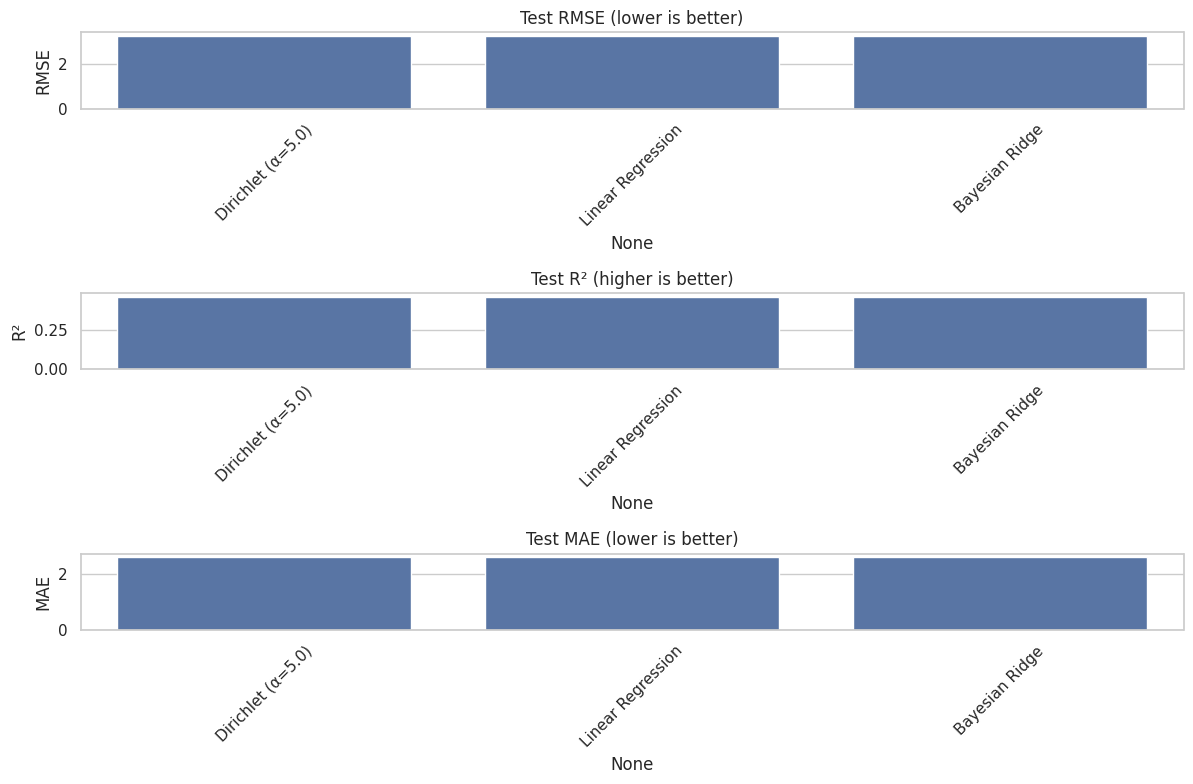

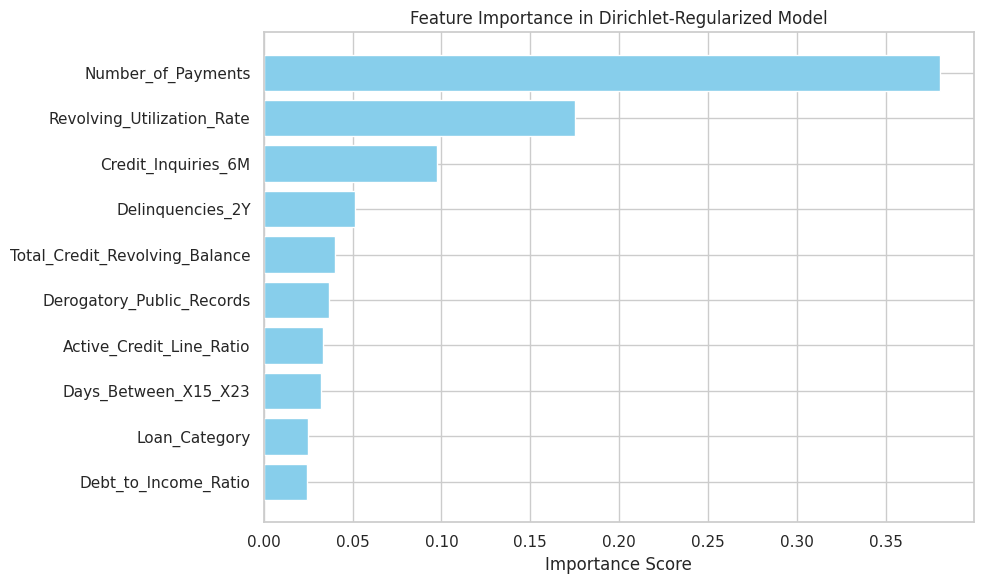

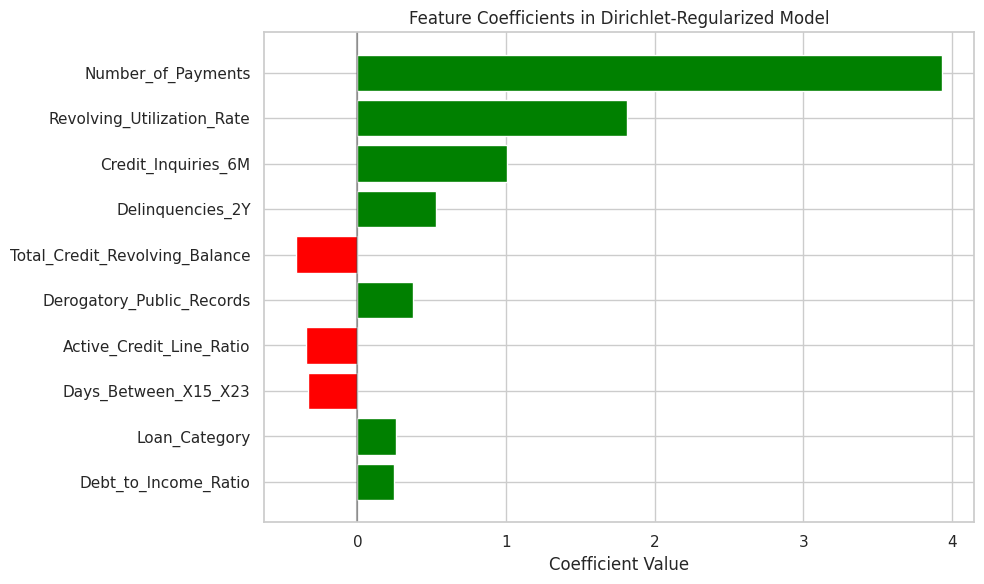

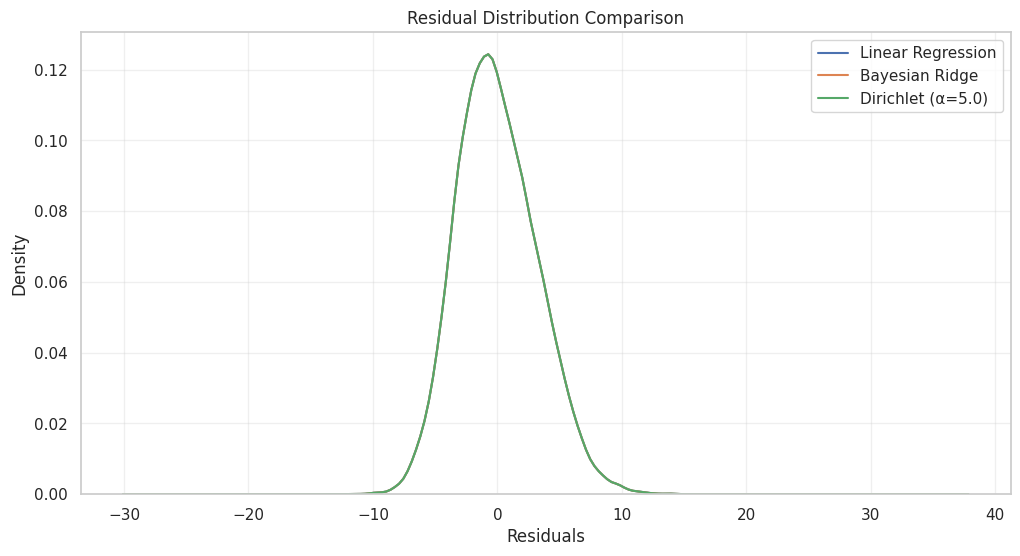

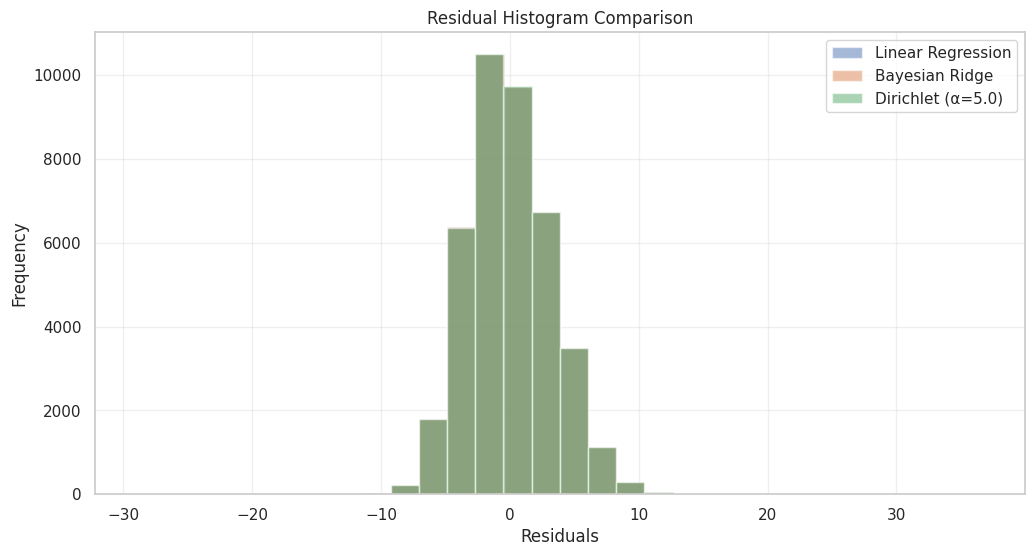


Analysis completed!


In [49]:
from scipy.optimize import minimize
def main():
    """Main function to run the analysis"""
    print("="*70)
    print("DIRICHLET-REGULARIZED REGRESSION FOR INTEREST RATE PREDICTION")
    print("="*70)

    # Train Dirichlet-regularized model with different alpha values
    alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
    dirichlet_results = {}

    print("\nTraining Dirichlet-regularized models with different alpha values...")
    for alpha in alphas:
        print(f"\nAlpha = {alpha}")
        result = dirichlet_regularized_least_squares(
            X_train, y_train, X_test, y_test, alpha=alpha
        )
        dirichlet_results[f'Dirichlet (α={alpha})'] = result

        # Print metrics
        print(f"  Test RMSE: {result['test_metrics']['rmse']:.4f}")
        print(f"  Test R²: {result['test_metrics']['r2']:.4f}")
        print(f"  Test MAE: {result['test_metrics']['mae']:.4f}")

    # Find best Dirichlet model
    best_dirichlet = min(dirichlet_results.items(),
                         key=lambda x: x[1]['test_metrics']['rmse'])
    best_alpha = best_dirichlet[0]
    print(f"\nBest Dirichlet model: {best_alpha}")

    # Train standard models for comparison
    print("\nTraining standard linear and Bayesian models for comparison...")
    lr_results, br_results = train_standard_models(
        X_train, y_train, X_test, y_test
    )


    # Create comparison dictionary with best Dirichlet model
    models_dict = {
        'Linear Regression': lr_results,
        'Bayesian Ridge': br_results,
        best_alpha: best_dirichlet[1]
    }

    # Compare models
    comparison = compare_models(models_dict)

    # Plot feature importance for best Dirichlet model
    plot_feature_importance(best_dirichlet[1])

    # Plot residuals comparison
    plot_residuals_comparison(models_dict, y_test)

    print("\nAnalysis completed!")
    return models_dict

if __name__ == "__main__":
    results = main()